# Hands-On Assignment 5

In this assignment, you will practice everything that you have learned so far in an end-to-end setting.
You will be provided with a dataset that is **unique to you**, and your task is to perform
all the steps from previous assignments to clean, explore, visualize, and analyze your dataset.

**Written Portion**: Additionally, you will create a report that describes your process and provides insights about your dataset.
Each section that should appear in your report is noted with an orange star (like normal HO tasks).  The report should be  4-6 pages (12 pt font, 1.5 line spacing), and turned in on Canvas as a PDF.

The coding aspect for this assignment will be turned in the same was as all other HO's,
by submitting this file to the autograder.


For this assignment, feel free to make additional functions instead of implementing everything in the provided function.

The objective of this assignment is for you to apply and solidify the skills you have learned in previous assignments.

# Prompt

You have graduated from this class, and are a huge success!
You landed a job doing data science at some fancy company.

You just got a new client with some really interesting problems you get to solve.
Unfortunately, because of a big mess-up on their side the data's metadata got corrupted up
(and the person that used to maintain the data just took a vow of silence and moved to a bog).

The only column you are sure about is the `label` column,
which contains a numeric label for each row.
Aside from that, the client does not know anything about the names, content, or even data types for each column.

Your task is to explore, clean, and analyze this data.
You should have already received an email with the details on obtaining your unique data.
Place it in the same directory as this notebook (and your `local_grader.py` script) and name it `data.txt`.

*I know this prompt may sound unrealistic, but I have literally been in a situation exactly like this.
I was working at a database startup, and one of our clients gave us data with over 70 columns and more than a million records and told us:
"The person who used to manage the data is no longer working with us, but this was the data they used to make all their decisions.
We also lost all the metadata information, like column names."
...
Working in industry is not always glamorous.
-Eriq*

# Part 0: Explore Your Data

Before you start doing things to/with your data, it's always a good idea to load up your data and take a look.

In [1]:
import pandas as pd
import re
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import matplotlib.pyplot as plt

# Modify this to point to your data.
unique_data = pd.read_csv('data.txt', sep = "\t")
unique_data

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11,col_12
0,3,607 m/(s^2),1.9635,rat,NaN,1875,1160 mph,0.2011,1267 lb,Golf,-0.6488 kg,490,1439,908
1,7,405 m/(s^2),-0.1556,cat,guinea pig,-460,1868 mph,1.6522,348 lb,ice hockey,1.4811 kg,848,-1448,1308
2,0,1439 m/(s^2),-0.0078,bird,reptile,847,-293 mph,1.3757,-156 lb,football,0.1872 kg,1152,257,111
3,4,411 m/(s^2),0.4747,guinea pig,pig,-661,992 mph,2.4454,1950 lb,tennis,0.3139 kg,640,-1529,-14
4,8,-525 m/(s^2),-0.6391,chicken,bird,1628,1925 mph,0.9748,-191 lb,track & field,0.2261 kg,-7,1845,1069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,6,0 m/(s^2),1.7373,rat,dog,-147,183 mph,0.4387,-87 lb,baseball,1.4708 kg,NaN,679,640
1196,1,3095 m/(s^2),-0.2860,cat,cat,-1,248 mph,-0.9551,1003 lb,"basketball, soccer",0.4564 kg,1483,672,-367
1197,4,228 m/(s^2),-0.4451,guinea pig,pig,-695,145 mph,-0.5404,323 lb,baseball,1.8237 kg,269,437,1186
1198,3,1004 m/(s^2),0.3925,rat,hamster,1874,946 mph,0.9413,1035 lb,golf,-0.1245 kg,1863,1444,171


Don't forget to checkout the column information.

In [2]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1200 non-null   int64  
 1   col_00  1190 non-null   object 
 2   col_01  1195 non-null   float64
 3   col_02  1186 non-null   object 
 4   col_03  1188 non-null   object 
 5   col_04  1189 non-null   object 
 6   col_05  1185 non-null   object 
 7   col_06  1190 non-null   object 
 8   col_07  1192 non-null   object 
 9   col_08  1190 non-null   object 
 10  col_09  1189 non-null   object 
 11  col_10  1191 non-null   object 
 12  col_11  1190 non-null   object 
 13  col_12  1198 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 131.4+ KB


And any numeric information.

In [3]:
unique_data.describe()

,label,col_01
count,1200.000000,1195.000000
mean,4.012500,0.286946
std,2.583197,0.721948
min,0.000000,-1.871200
25%,2.000000,-0.221550
50%,4.000000,0.258900
75%,6.000000,0.750950
max,8.000000,2.279400


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Introduction</h4>

Briefly describe the dataset you’re given and define the goal of the project and how you approach it.
For example, you can present a basic introduction of your data (shape and proposed data types)
and your goal is to use these features to predict the label of the response variable.
Then you propose a few models that are suitable for this project which will be introduced in the modeling section.

# Part 1: Data Cleaning

As always, we should start with data cleaning.
Take what you learned from HO3 to clean up this messy data to a point where it is ready for machine learning algorithms.

Some things you may want to do:
 - Deal with missing/empty values.
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

<h4 style="color: darkorange; font-size: x-large";>★ Task 1.A</h4>

Complete the following function that takes in a DataFrame and outputs a clean version of the DataFrame.
You can assume that the frame has all the same structure as your unique dataset.
You can return the same or a new data frame.

In [2]:
def clean_data(frame):
    df = frame.dropna()
    re_num = r'[+-]?\d+(?:\.\d*)?|\.\d+'
    ignore_cols = ['label', 'col_02', 'col_03', 'col_08']
    
    def clean_col(col):
        cleaned = []
        for entry in col:
            try:
                target = re.findall(re_num, str(entry))
                if target:
                    num = target[0].strip()
                    if '.' in num:
                        cleaned.append(float(num))
                    else:
                        cleaned.append(int(num))
                else:
                    cleaned.append(0)
            except Exception:
                cleaned.append(0)
        return cleaned
    
    numeric_columns = []
    categorical_columns = []

    for col in df.columns:
        if col in ignore_cols:
            if col == 'label':
                continue
            categorical_columns.append(col)
        else:
            try:
                df[col] = clean_col(df[col])
                df[col] = pd.to_numeric(df[col])
                numeric_columns.append(col)
            except Exception:
                continue

    if categorical_columns:
        df = pd.get_dummies(df, columns=categorical_columns)
    
    return df

unique_data = clean_data(unique_data)
unique_data

/tmp/ipykernel_14653/2483279053.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = clean_col(df[col])
/tmp/ipykernel_14653/2483279053.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


,label,col_00,col_01,col_04,col_05,col_06,col_07,col_09,col_10,col_11,...,col_08_motor sports,col_08_running,col_08_soccer,"col_08_soccer, badminton","col_08_soccer, basketball",col_08_tennis,col_08_track & field,col_08_volleyball,"col_08_volleyball, boxing","col_08_volleyball, football"
1,7,405,-0.1556,-460,1868,1.6522,348,1.4811,848,-1448,...,False,False,False,False,False,False,False,False,False,False
2,0,1439,-0.0078,847,-293,1.3757,-156,0.1872,1152,257,...,False,False,False,False,False,False,False,False,False,False
3,4,411,0.4747,-661,992,2.4454,1950,0.3139,640,-1529,...,False,False,False,False,False,True,False,False,False,False
4,8,-525,-0.6391,1628,1925,0.9748,-191,0.2261,-7,1845,...,False,False,False,False,False,False,True,False,False,False
5,1,-360,0.6571,725,700,2.0199,461,-0.4965,682,2008,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,5,1409,1.0926,-693,-629,-0.7708,897,0.6303,622,-130,...,False,True,False,False,False,False,False,False,False,False
1196,1,3095,-0.2860,-1,248,-0.9551,1003,0.4564,1483,672,...,False,False,False,False,False,False,False,False,False,False
1197,4,228,-0.4451,-695,145,-0.5404,323,1.8237,269,437,...,False,False,False,False,False,False,False,False,False,False
1198,3,1004,0.3925,1874,946,0.9413,1035,-0.1245,1863,1444,...,False,False,False,False,False,False,False,False,False,False


Now we should also be able to view all the numeric columns.

In [5]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 1 to 1199
Columns: 119 entries, label to col_08_volleyball, football
dtypes: bool(108), float64(3), int64(8)
memory usage: 214.6 KB


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Cleaning</h4>

Describe the steps you took for data cleaning.
Why did you do this?
Did you have to make some choices along the way? If so, describe them.

# Part 2: Data Visualization

Once you have cleaned up the data, it is time to explore it and find interesting things.
Part of this exploration, will be visualizing the data in a way that makes it easier for yourself and others to understand.
Use what you have learned in HO1 and HO2 to create some visualizations for your dataset.

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Visualization</h4>

Create at least two different visualizations that help describe what you see in your dataset.
Include these visualizations in your report along with descriptions of
how you created the visualization,
what data preparation you had to do for the visualization (aside from the data cleaning in the previous part),
and what the visualization tells us about the data.

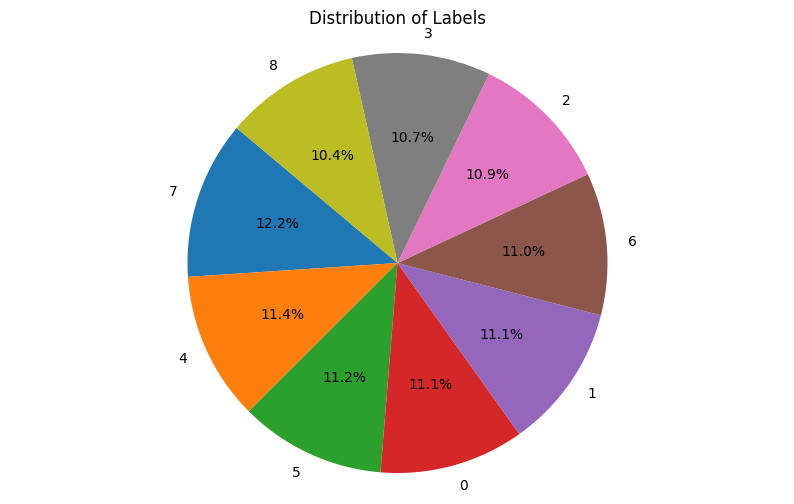

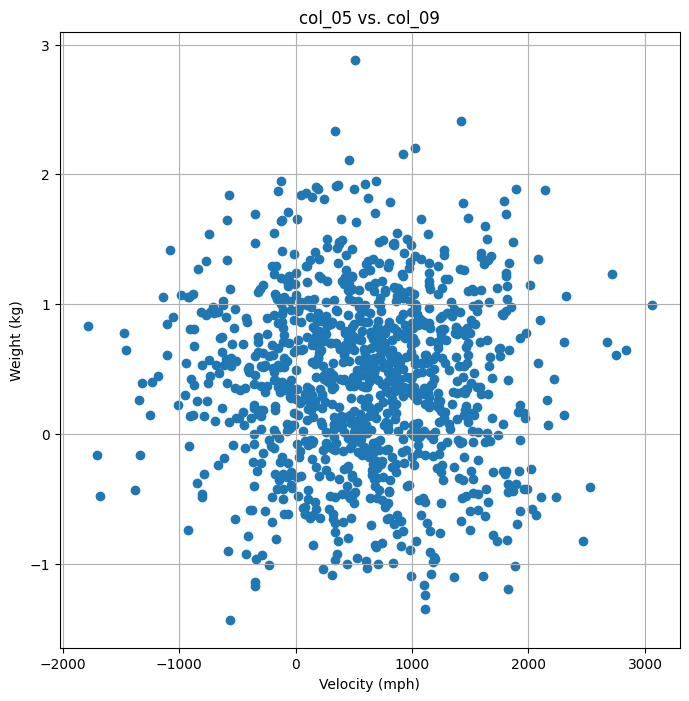

In [10]:
label_counts = unique_data['label'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(unique_data['col_05'], unique_data['col_09'])
plt.xlabel('Velocity (mph)')
plt.ylabel('Weight (kg)')
plt.title('col_05 vs. col_09')
plt.grid(True)

plt.show()

# Part 3: Modeling

Now that you have a good grasp of your clean data,
it is time to do some machine learning!
(Technically all our previous steps were also machine learning,
but now we get to use classifiers!)

Use the skills you developed to select **three** classifiers and implement them on your data.
For example, you can narrow down your choices to three classifiers which may include:
- Logistic regression
- K-nearest neighbors
- Decision tree
- Or others

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.A</h4>

Complete the following function that takes in no parameters,
and returns a list with **three** untrained classifiers you are going to explore in this assignment.
This method may set parameters/options for the classifiers, but should not do any training/fitting.

For example, if you wanted to use logistic regression,
then **one** of your list items may be:
```
sklearn.linear_model.LogisticRegression()
```

In [6]:
def create_classifiers():
    lr = LogisticRegression()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    classifiers = [lr, knn, dt]
    return classifiers

my_classifiers = create_classifiers()
my_classifiers

[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]

Now that we have some classifiers, we can see how they perform.

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.B</h4>

Complete the following function that takes in an untrained classifier, a DataFrame, and a number of folds.
This function should run k-fold cross validation with the classifier and the data,
and return a list with the accuracy of each run of cross validation.
You can assume that the frame has the column `label` and the rest of the columns can be considered clean numeric features.

Note that you may have to break your frame into features and labels to do this.
Do not change the passed-in frame (make copies instead).

If you are getting any `ConvergenceWarning`s you may either ignore them,
or try and address them
(they will not affect your autograder score, but may be something to discuss in the written portion of this assignment).

In [7]:
def cross_fold_validation(classifier, frame, folds):
    copy = frame.copy()
    X = copy.drop('label', axis=1)
    y = copy['label']
    accuracy_scores = cross_val_score(classifier, X, y, cv=folds).tolist()
    return accuracy_scores

my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, unique_data, 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))

/home/phzliu/cse40_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/phzliu/cse40_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Classifier: LogisticRegression, Accuracy: [0.9907407407407407, 0.9768518518518519, 0.9534883720930233, 0.9813953488372092, 0.9534883720930233].
Classifier: KNeighborsClassifier, Accuracy: [0.2037037037037037, 0.22685185185185186, 0.19534883720930232, 0.19534883720930232, 0.1813953488372093].
Classifier: DecisionTreeClassifier, Accuracy: [0.9120370370370371, 0.8981481481481481, 0.8837209302325582, 0.9069767441860465, 0.9116279069767442].


<h4 style="color: darkorange; font-size: x-large";>★ Task 3.C</h4>

Complete the following function that takes in two equally-sized lists of numbers and a p-value.
This function should compute whether there is a statistical significance between
these two lists of numbers using a [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
at the given p-value.
Return `True` if there is a statistical significance, and `False` otherwise.
Hint: If you wish, you may use the `ttest_ind()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) provided in the scipy package. 

In [ ]:
def significance_test(a_values, b_values, p_value):
    t_val, p_val = stats.ttest_ind(a_values, b_values)
    if p_val < p_value:
        return True
    else:
        return False

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Modeling</h4>

Describe the classifiers you have chosen.
Be sure to include all details about any parameter settings used for the algorithms.

Compare the performance of your models using k-fold validation.
You may look at accuracy, F1 or other measures.

Then, briefly summarize your results.
Are your results statistically significant?
Is there a clear winner?
What do the standard deviations look like, and what do they tell us about the different models?
Include a table like Table 1.

<center>Table 1: Every table need a caption.</center>

| Model | Mean Accuracy | Standard Deviation of Accuracy |
|-------|---------------|--------------------------------|
| Logistic Regression | 0.724 | 0.004
| K-Nearest Neighbor | 0.750 | 0.003
| Decision Tree | 0.655 | 0.011

# Part 4: Analysis

Now, take some time to go over your results for each classifier and try to make sense of them.
 - Why do some classifiers work better than others?
 - Would another evaluation metric work better than vanilla accuracy?
 - Is there still a problem in the data that should fixed in data cleaning?
 - Does the statistical significance between the different classifiers make sense?
 - Are there parameters for the classifier that I can tweak to get better performance?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Analysis</h4>

Discuss your observations, the relationship you found, and how you applied concepts from the class to this project.
For example, you may find that some feature has the most impact in predicting your response variable or removing a feature improves the model accuracy.
Or you may observe that your training accuracy is much higher than your test accuracy and you may want to explain what issues may arise.

# Part 5: Conclusion

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Conclusion</h4>

Briefly summarize the important results and conclusions presented in the project.
What are the important points illustrated by your work?
Are there any areas for further investigation or improvement?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: References</h4>

Include a standard bibliography with citations referring to techniques or published papers you used throughout your report (if you used any).

For example:
```
[1] Derpanopoulos, G. (n.d.). Bayesian Model Checking & Comparison.
https://georgederpa.github.io/teaching/modelChecking.html.
```

# Part XC: Extra Credit

So far you have used a synthetic dataset that was created just for you.
But, data science is always more interesting when you are dealing with actual data from the real world.
Therefore, you will have an opportunity for extra credit on this assignment using real-world data.

For extra credit, repeat the **written tasks** of Parts 0 through 4 with an additional dataset that you find yourself.
For the written portion of the extra credit for Part 0, include information about where you got the data and what the data represents.
You may choose any dataset that represents real data (i.e., is **not** synthetic or generated)
and is **not** [pre-packaged in scikit-learn](https://scikit-learn.org/stable/datasets.html).

Below are some of the many places you can start looking for datasets:
 - [Kaggle](https://www.kaggle.com/datasets) -- Kaggle is a website focused around machine learning competitions,
       where people compete to see who can get the best results on a dataset.
       It is very popular in the machine learning community and has thousands of datasets with descriptions.
       Make sure to read the dataset's description, as Kaggle also has synthetic datasets.
 - [data.gov](https://data.gov/) -- A portal for data from the US government.
        The US government has a lot of data, and much of it has to be available to the public by law.
        This portal contains some of the more organized data from several different government agencies.
        In general, the government has A LOT of interesting data.
        It may not always be clean (remember the CIA factbook), but it is interesting and available.
        All data here should be real-world, but make sure to read the description to verify.
 - [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) -- UC Irvine has their own data repository with a few hundred datasets on many different topics.
        Make sure to read the dataset's description, as UCI also has synthetic datasets.
 - [WHO's Global Health Observatory](https://apps.who.int/gho/data/node.home) -- The World Health Organization keeps track of many different health-related statistics for most of the countries in the world.
        All data here should be real-world, but make sure to read the description to verify.
 - [Google's Dataset Search](https://datasetsearch.research.google.com/) -- Google indexes many datasets that can be searched here.

You can even create a dataset from scratch if you find some data you like that is not already organized into a specific dataset.
The only real distinction between "data" and a "dataset" is that a dataset is organized and finite (has a fixed size).

Create a new section in your written report for this extra credit and include all the written tasks for the extra credit there.
Each written task/section that you complete for your new dataset is eligible for extra credit (so you can still receive some extra credit even if you do not complete all parts).
There is no need to submit any code for the extra credit.
If you created a new dataset, include the dataset or links to it with your submission.